In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Bitcoin Historical Data.csv to Bitcoin Historical Data.csv


In [152]:
# Read the csv file for analysis
data = pd.read_csv('Bitcoin Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 16, 2015",262.9,254.4,267.3,253.9,95.18K,3.31%
1,"Oct 17, 2015",269.6,262.9,275.4,261.7,113.84K,2.55%
2,"Oct 18, 2015",261.7,269.6,272.4,259.5,52.27K,-2.93%
3,"Oct 19, 2015",263.8,261.7,266.0,259.9,58.17K,0.82%
4,"Oct 20, 2015",269.8,263.8,272.1,262.7,75.40K,2.25%


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2193 non-null   object
 1   Price     2193 non-null   object
 2   Open      2193 non-null   object
 3   High      2193 non-null   object
 4   Low       2193 non-null   object
 5   Vol.      2193 non-null   object
 6   Change %  2193 non-null   object
dtypes: object(7)
memory usage: 120.1+ KB


In [154]:
print(data.dtypes)

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [155]:
df = pd.to_datetime(data['Date']) #coverting date from object to datetime

In [156]:
data['Price'] = data['Price'].str.replace(',', '') #removing commas from price and converting to float
data['Price'] = data['Price'].astype(float)

# checking whether volume is in k or m and converting it respectively .
for i,j in data.iterrows():
  volume = data.at[i,'Vol.'] 
  if (volume[-1] == 'K'): 
    volume = volume.replace('K', '')
    data.at[i,'Vol.'] = float(volume)*1000 
  elif(volume[-1] == 'M'):
    volume = volume.replace('M', '')
    data.at[i,'Vol.'] = float(volume)*1000000
  
#removing % from change and converting it to float  
data['Change %'] = data['Change %'].str.replace('%', '')
data['Change %'] = data['Change %'].astype(float)

In [157]:
data['Open'] = data['Open'].str.replace(',', '')
data['Open'] = data['Open'].astype(float)

data['High'] = data['High'].str.replace(',', '')
data['High'] = data['High'].astype(float)

data['Low'] = data['Low'].str.replace(',', '')
data['Low'] = data['Low'].astype(float)

In [158]:
data['Vol.'] = data['Vol.'].astype(float)

In [159]:
data['Date'] = df

In [160]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2015-10-16,262.9,254.4,267.3,253.9,95180.0,3.31
1,2015-10-17,269.6,262.9,275.4,261.7,113840.0,2.55
2,2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93
3,2015-10-19,263.8,261.7,266.0,259.9,58170.0,0.82
4,2015-10-20,269.8,263.8,272.1,262.7,75400.0,2.25


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2193 non-null   datetime64[ns]
 1   Price     2193 non-null   float64       
 2   Open      2193 non-null   float64       
 3   High      2193 non-null   float64       
 4   Low       2193 non-null   float64       
 5   Vol.      2193 non-null   float64       
 6   Change %  2193 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 120.1 KB


In [162]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03,2193.000000
mean,11049.915002,11022.382809,11355.344140,10660.411628,5.079180e+05,0.332088
std,14372.323846,14334.893312,14787.183059,13841.095977,1.298619e+06,4.028708
min,261.700000,254.400000,266.000000,253.900000,2.600000e+02,-39.180000
25%,1248.200000,1243.100000,1257.000000,1218.400000,7.098000e+04,-1.250000
50%,6867.800000,6862.700000,7137.400000,6681.500000,1.420700e+05,0.230000
75%,10473.000000,10470.100000,10789.600000,10160.700000,5.099400e+05,1.980000
max,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,25.560000


In [163]:
data.shape

(2193, 7)

In [164]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

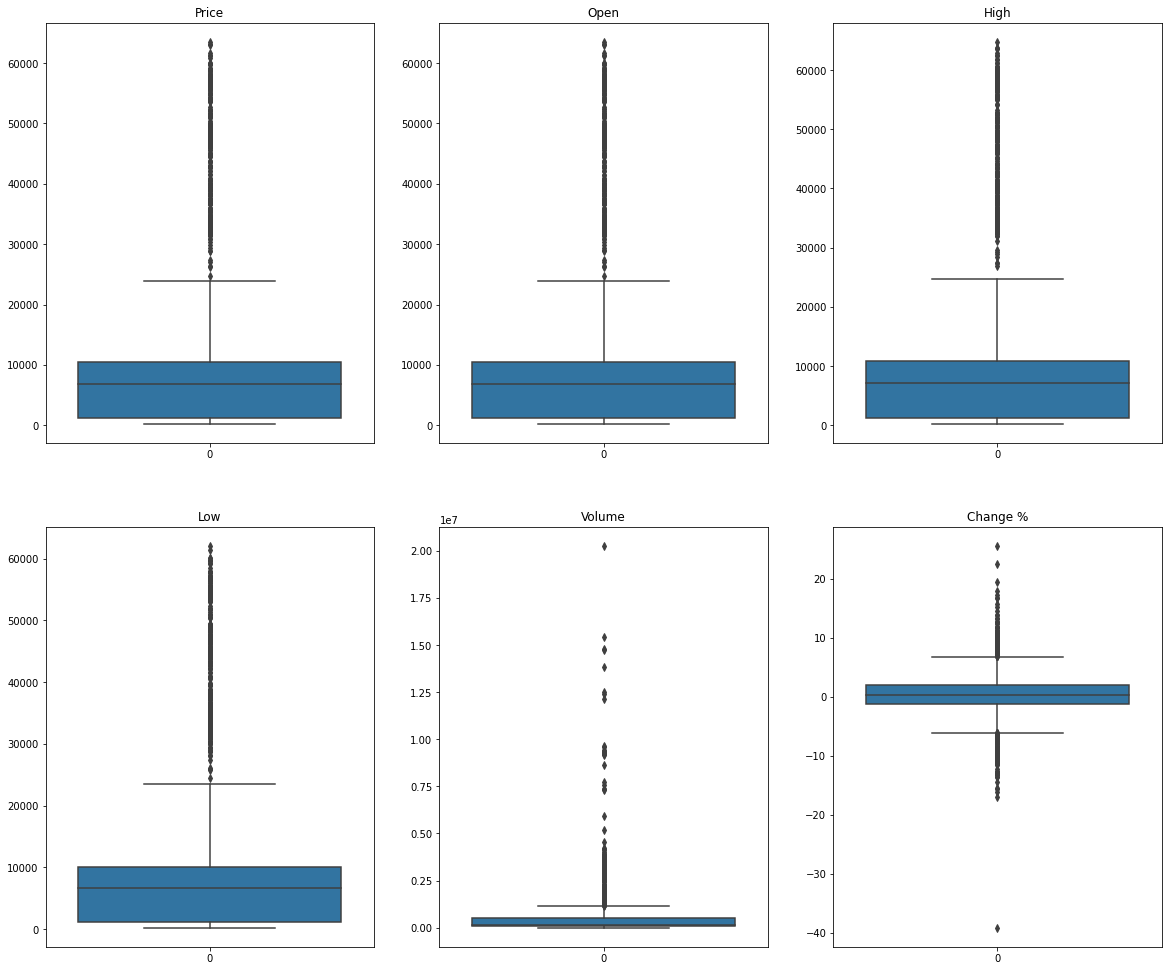

In [165]:
figure, axes = plt.subplots(2, 3, figsize=(20, 17))

ax=sns.boxplot(ax=axes[0,0], data=data['Price'])
ax.set_title('Price')
ax=sns.boxplot(ax=axes[0,1], data=data['Open'])
ax.set_title('Open')
ax=sns.boxplot(ax=axes[0,2], data=data['High'])
ax.set_title('High')
ax=sns.boxplot(ax=axes[1,0], data=data['Low'])
ax.set_title('Low')
ax=sns.boxplot(ax=axes[1,1], data=data['Vol.'])
ax.set_title('Volume')
ax=sns.boxplot(ax=axes[1,2], data=data['Change %'])
ax.set_title('Change %')

plt.show()

In [166]:
Quartile1 = np.percentile(data['Vol.'], 25, interpolation = 'midpoint')
Quartile3 = np.percentile(data['Vol.'], 75, interpolation = 'midpoint')
IQR = Quartile3 - Quartile1

print("Upper bound:",(Quartile3+1.5*IQR))
print("Lower bound:", (Quartile1-1.5*IQR))

print("No. of Outliers:", ((data['Vol.'] < (Quartile1 - 1.5 * IQR)) | (data['Vol.'] > (Quartile3 + 1.5 * IQR))).sum() )

Upper bound: 1168380.0
Lower bound: -587460.0
No. of Outliers: 160


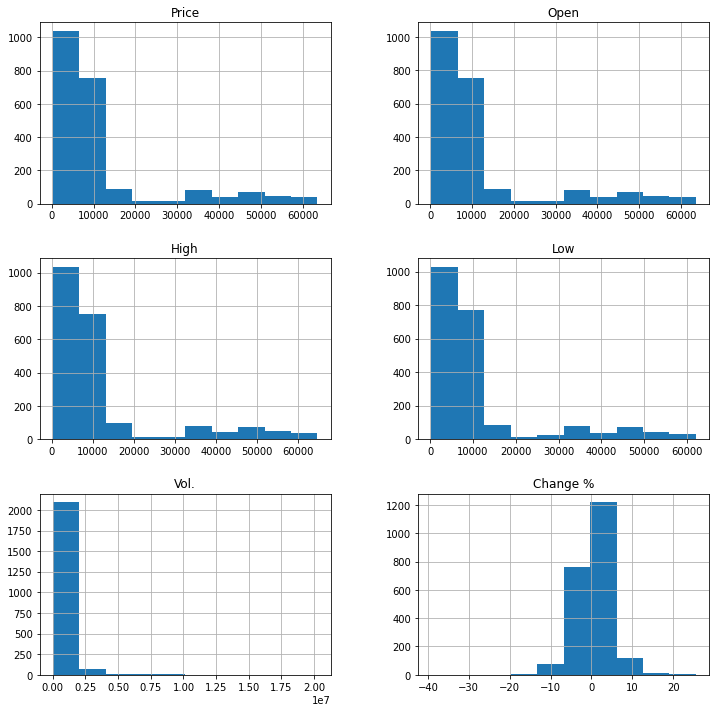

In [167]:
data.hist(figsize=(12,12))
plt.show()

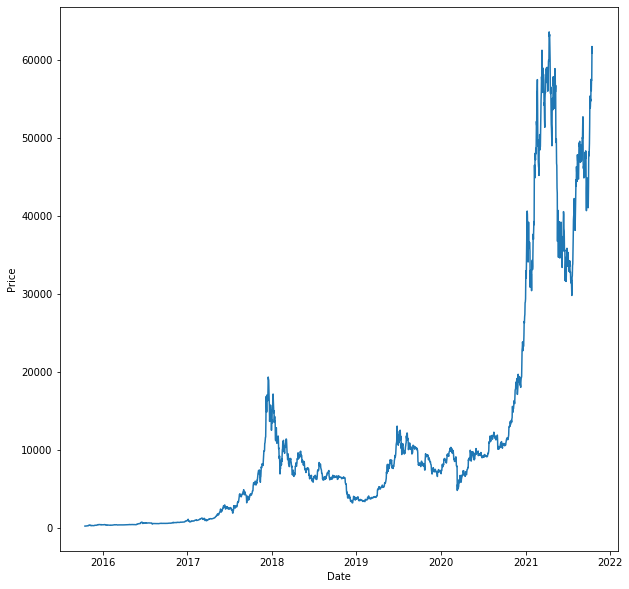

In [168]:
plt.figure(figsize=(10,10))
sns.lineplot(x=data['Date'],y=data['Price'])

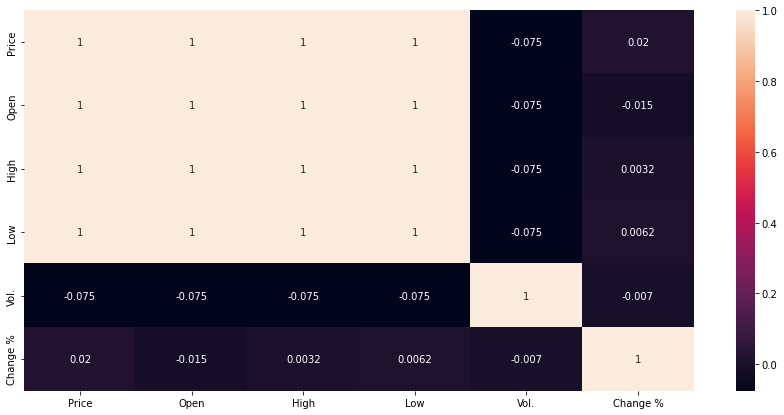

In [169]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

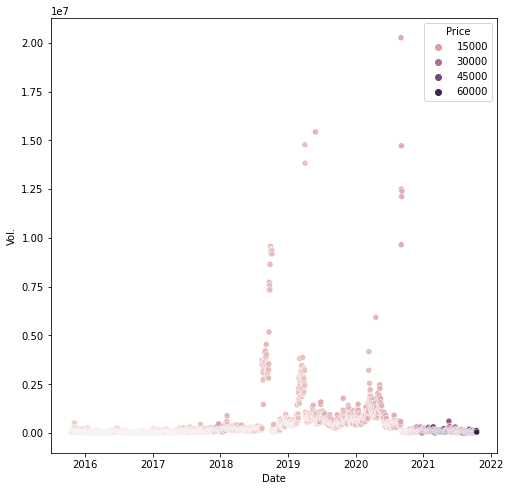

In [170]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['Date'],y=data['Vol.'],hue=data['Price'])

In [171]:
# creating a dataframe with only price as input
df1=data.reset_index()['Price']

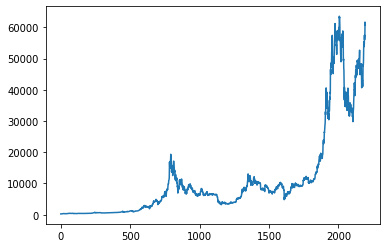

In [172]:
plt.plot(df1)

In [173]:
df1

0         262.9
1         269.6
2         261.7
3         263.8
4         269.8
         ...   
2188    56015.9
2189    57380.1
2190    57345.8
2191    61672.5
2192    60861.1
Name: Price, Length: 2193, dtype: float64

In [174]:
#Scaling price data into range of 0,1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [175]:
df1

array([[1.89635773e-05],
       [1.24843550e-04],
       [0.00000000e+00],
       ...,
       [9.02098952e-01],
       [9.70473710e-01],
       [9.57651171e-01]])

In [176]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [177]:
training_size,test_size

(1644, 549)

In [178]:
train_data

array([[1.89635773e-05],
       [1.24843550e-04],
       [0.00000000e+00],
       ...,
       [1.03977294e-01],
       [1.04129003e-01],
       [1.00623902e-01]])

In [179]:
import numpy
# convert an array of values into a dataset matrix , by given timestep
 ### for example if we have to predict on basis of previous 15 days price we will take i=0, 0,1,2,3-----14 as input data set and the  15th value be in our y dataset.
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [180]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [181]:
X_train

array([[1.89635773e-05, 1.24843550e-04, 0.00000000e+00, ...,
        6.60564609e-04, 8.20174718e-04, 1.03351496e-03],
       [1.24843550e-04, 0.00000000e+00, 3.31862603e-05, ...,
        8.20174718e-04, 1.03351496e-03, 7.82247563e-04],
       [0.00000000e+00, 3.31862603e-05, 1.28004147e-04, ...,
        1.03351496e-03, 7.82247563e-04, 9.68722740e-04],
       ...,
       [9.43754030e-02, 8.89502396e-02, 9.68612119e-02, ...,
        1.11052289e-01, 1.04321799e-01, 1.04396073e-01],
       [8.89502396e-02, 9.68612119e-02, 9.72009760e-02, ...,
        1.04321799e-01, 1.04396073e-01, 1.05183062e-01],
       [9.68612119e-02, 9.72009760e-02, 1.00772450e-01, ...,
        1.04396073e-01, 1.05183062e-01, 1.03977294e-01]])

In [182]:
print(X_train.shape), print(y_train.shape)

(1628, 15)
(1628,)


(None, None)

In [183]:
print(X_test.shape), print(ytest.shape)

(533, 15)
(533,)


(None, None)

In [184]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [185]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [186]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [187]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 15, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 15, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 83ms/step - loss: 0.0019 - val_loss: 0.0059
Epoch 2/100
26/26 [==============================] - 1s 37ms/step - loss: 2.2406e-04 - val_loss: 0.0036
Epoch 3/100
26/26 [==============================] - 1s 35ms/step - loss: 1.9468e-04 - val_loss: 0.0054
Epoch 4/100
26/26 [==============================] - 1s 35ms/step - loss: 1.9012e-04 - val_loss: 0.0078
Epoch 5/100
26/26 [==============================] - 1s 35ms/step - loss: 1.7140e-04 - val_loss: 0.0086
Epoch 6/100
26/26 [==============================] - 1s 35ms/step - loss: 1.6090e-04 - val_loss: 0.0124
Epoch 7/100
26/26 [==============================] - 1s 35ms/step - loss: 1.5834e-04 - val_loss: 0.0138
Epoch 8/100
26/26 [==============================] - 1s 35ms/step - loss: 1.5598e-04 - val_loss: 0.0134
Epoch 9/100
26/26 [==============================] - 1s 34ms/step - loss: 1.3969e-04 - val_loss: 0.0125
Epoch 10/100
26/26 [==============================] - 1s 34ms/step -

In [189]:
import tensorflow as tf

In [190]:
###prediction 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [191]:
##calculating r2 score
from sklearn.metrics import r2_score
accuracy = r2_score(ytest, test_predict)

In [192]:
accuracy

0.9754354334005653

In [193]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [194]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6141.432046873059

In [195]:
### Test Data RMSE
Rmse = math.sqrt(mean_squared_error(ytest,test_predict))
print(Rmse)

32988.67140864067


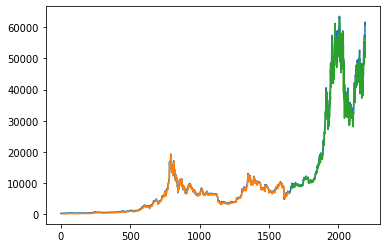

In [196]:
### Plotting 
# shift train predictions for plotting
look_back=15
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [197]:
len(test_data)

549

In [198]:
x_input=test_data[534:].reshape(1,-1)
x_input.shape

(1, 15)

In [199]:
temp_input=list(x_input)

temp_input=temp_input[0].tolist()

In [200]:
temp_input

[0.7491434784257702,
 0.7575696279346135,
 0.7738024500941857,
 0.8092327336628782,
 0.8701358424253149,
 0.8458103136575683,
 0.8478773435820932,
 0.86411964753031,
 0.8600930479525656,
 0.9041770439575721,
 0.8810825674155172,
 0.9026409941971453,
 0.9020989519462951,
 0.9704737101606846,
 0.9576511713169571]

In [201]:

# demonstrate prediction for next 15 days
from numpy import array

lst_output=[]
n_steps=15
i=0
while(i<15):
    
    if(len(temp_input)>15):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else: #for very first iteration it will enter in this loop
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
       
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8503528]
1 day input [0.75756963 0.77380245 0.80923273 0.87013584 0.84581031 0.84787734
 0.86411965 0.86009305 0.90417704 0.88108257 0.90264099 0.90209895
 0.97047371 0.95765117 0.85035282]
1 day output [[0.6891513]]
2 day input [0.77380245 0.80923273 0.87013584 0.84581031 0.84787734 0.86411965
 0.86009305 0.90417704 0.88108257 0.90264099 0.90209895 0.97047371
 0.95765117 0.85035282 0.68915129]
2 day output [[0.53594005]]
3 day input [0.80923273 0.87013584 0.84581031 0.84787734 0.86411965 0.86009305
 0.90417704 0.88108257 0.90264099 0.90209895 0.97047371 0.95765117
 0.85035282 0.68915129 0.53594005]
3 day output [[0.43736103]]
4 day input [0.87013584 0.84581031 0.84787734 0.86411965 0.86009305 0.90417704
 0.88108257 0.90264099 0.90209895 0.97047371 0.95765117 0.85035282
 0.68915129 0.53594005 0.43736103]
4 day output [[0.39497092]]
5 day input [0.84581031 0.84787734 0.86411965 0.86009305 0.90417704 0.88108257
 0.90264099 0.90209895 0.97047371 0.95765117 0.85035282 0.68915129
 0.5359

In [44]:
day_new=np.arange(1,16)
day_pred=np.arange(16,31)

In [45]:
len(df1)

2193

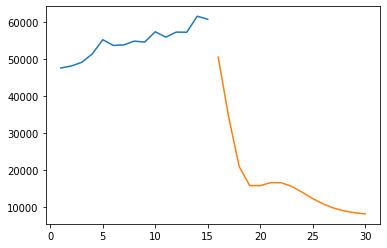

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[2178:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
## prediction shows that price is about fall and again having some peak and then decrease.

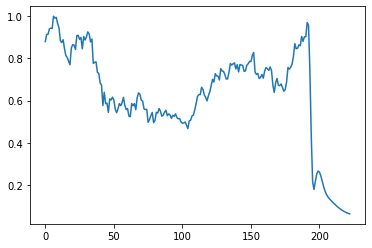

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

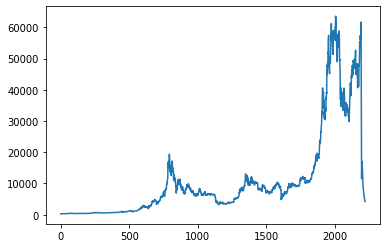

In [ ]:
plt.plot(df3)